In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("BostonHousing.csv")

In [20]:
df.shape

(506, 14)

In [21]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
df.drop(['medv'], axis=1, inplace=True)

In [23]:
df.shape

(506, 13)

In [24]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## Outliers can be of two types:

1) Univariate Outliers: They can be find by looking at the values of single feature space.

2) Multivariate Outlier: They can be find by looking at the n-dimensional feature space.

<AxesSubplot:xlabel='dis'>

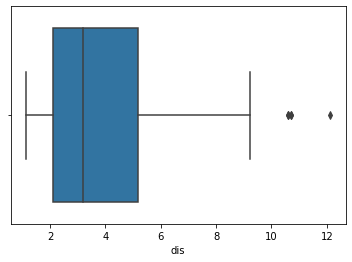

In [25]:
# creating a box plot
sns.boxplot(x=df['dis'])

In [26]:
Q1 = df['dis'].quantile(0.25)
Q3 = df['dis'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['dis'] >= Q1 - 1.5 * IQR) & (df['dis'] <= Q3 + 1.5 *IQR)
df.loc[filter]  

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


# outlier detection using simple percentile

In [31]:
# simple data
df1 = pd.read_csv("heights.csv")

In [32]:
# view some above rows
df1.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [33]:
# calculating the max percentile
max_threshold = df1['height'].quantile(0.95)
max_threshold

9.689999999999998

In [34]:
# condition
df1[df1['height']>max_threshold]

,name,height
9,imran,14.5


In [35]:
# calculating the min percentile
min_threshold = df1['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [36]:
# condition
df1[df1['height']<min_threshold]

,name,height
12,yoseph,1.2


In [38]:
# removing the outlier
df2 = df1[(df1['height']<max_threshold) & (df1['height']>min_threshold)]
df2

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [40]:
# analyzing outlier in complex data
df4 = pd.read_csv("bhp.csv")
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [41]:
df4.shape

(13200, 7)

In [42]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<AxesSubplot:xlabel='price_per_sqft'>

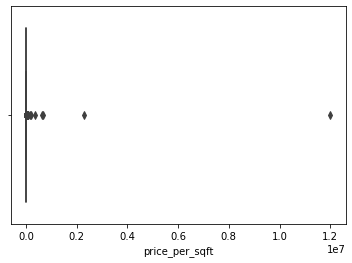

In [46]:
# creating a box plot
sns.boxplot(x=df4['price_per_sqft'])

<AxesSubplot:xlabel='total_sqft'>

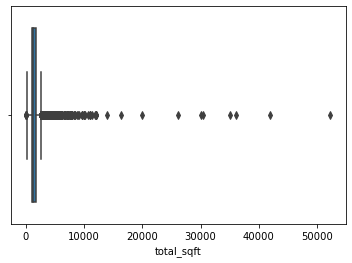

In [47]:
sns.boxplot(x=df4['total_sqft'])

In [48]:
max_threshold = df4['price_per_sqft'].quantile(0.999)
max_threshold

50959.36200000098

In [49]:
min_threshold = df4['price_per_sqft'].quantile(0.001)
min_threshold

1366.184

In [50]:
df5 = df4[(df4['price_per_sqft']<max_threshold) & (df4['price_per_sqft']>min_threshold)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [52]:
df5.shape

(13172, 7)

In [53]:
df5.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10787,Sarjapur Road,3 BHK,1691.0,3.0,119.00,3,7037
10343,Yeshwanthpur,2 BHK,1164.0,2.0,64.08,2,5505
12038,Domlur,3 BHK,2955.0,3.0,235.00,3,7952
8977,Varthur,2 BHK,1035.0,2.0,60.00,2,5797
1198,Sahakara Nagar,3 Bedroom,1200.0,3.0,200.00,3,16666
12568,other,4 Bedroom,3100.0,5.0,425.00,4,13709
12403,Jakkur,2 BHK,1432.0,2.0,85.00,2,5935
6557,Kundalahalli,3 BHK,1724.0,3.0,146.00,3,8468
2699,Vittasandra,2 BHK,1246.0,2.0,67.40,2,5409
98,Yeshwanthpur,3 BHK,2502.0,3.0,138.00,3,5515


# Outlier Detection using z-score and Standard Deviation

In [56]:
data = pd.read_csv("heights_data.csv")
data.sample(5)

,gender,height
5233,Female,64.586856
9689,Female,65.838805
3098,Male,70.839872
5937,Female,64.831449
7529,Female,61.984873


In [57]:
data.shape

(10000, 2)

In [59]:
data.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


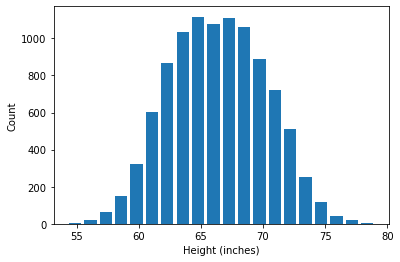

In [58]:
plt.hist(data['height'],bins=20,rwidth=0.8)
plt.xlabel("Height (inches)")
plt.ylabel("Count")
plt.show()

From  the above visual we can understand that the data follows Normal Distribution.

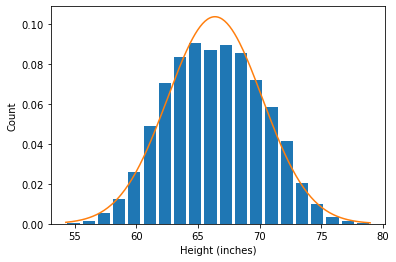

In [62]:
from scipy.stats import norm

plt.hist(data['height'], bins=20, rwidth=0.8, density=True)
plt.xlabel("Height (inches)")
plt.ylabel("Count")

rng = np.arange(data['height'].min(), data['height'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, data['height'].mean(), data['height'].std()))

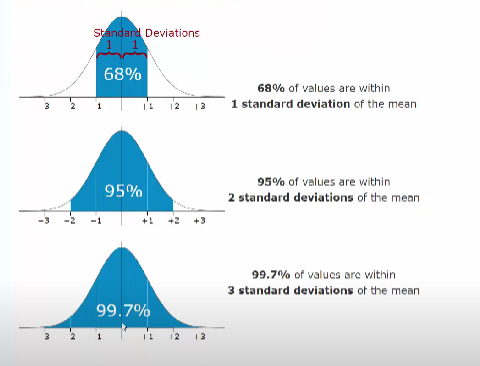

In [63]:
data['height'].mean()

66.3675597548656

In [64]:
data['height'].std()

3.847528120795573

We will use 3 standard deviation for removing the outliers. This is the standard throughout the industry. 

But depending upon the dataset people also use 4 SD, 5 SD also and if dataset is small people also use 2 SD. This depends particularly on your instance and point of view for the data.

In [66]:
# finding the upper limit of 3 Standard Deviation
upper_limit = data['height'].mean() + 3*data['height'].std()
upper_limit

77.91014411725232

In [67]:
# finding the lower limit of 3 Standard Deviation
lower_limit = data['height'].mean() - 3*data['height'].std()
lower_limit

54.824975392478876

In [69]:
data[(data['height']>upper_limit) | (data['height']<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [71]:
data_wo = data[(data['height']<upper_limit) & (data['height']>lower_limit)]
data_wo

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [72]:
data_wo.shape

(9993, 2)

In [74]:
# how many rows we removed as outliers
data.shape[0] - data_wo.shape[0]

7

# Detecting Outliers using Z-Score

Z score is a way to achieve same thing that we did above.

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

**Formula to Calculate Z-Score is**

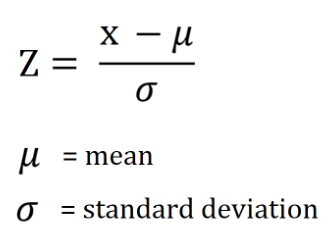

In [76]:
data['zscore'] =  data['height'] - data['height'].mean()

In [80]:
data['zscore'] = (data['height'] - data['height'].mean())/data['height'].std()
data.sample(10)

,gender,height,zscore
2565,Male,72.122785,1.495824
5465,Female,63.973925,-0.622123
826,Male,66.184108,-0.047680
1265,Male,74.955065,2.231954
3938,Male,70.562189,1.090214
7518,Female,64.753141,-0.419599
6758,Female,63.526836,-0.738324
361,Male,67.486824,0.290905
1501,Male,71.970526,1.456251
8084,Female,66.862739,0.128701


In [82]:
data[data['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [83]:
data[data['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [84]:
# List of outliers
data[(data.zscore<-3) | (data.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [86]:
# removing those outlier
data_wo_1 = data[(data.zscore>-3) & (data.zscore<3)]
data_wo_1.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [87]:
data_wo_1.shape

(9993, 3)

In [88]:
data.shape

(10000, 3)

# Outlier Detection using IQR technique

In [90]:
iqr_data = pd.read_csv("heights.csv")

In [91]:
iqr_data.shape

(14, 2)

In [93]:
iqr_data

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [94]:
iqr_data.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [95]:
Q1 = iqr_data['height'].quantile(0.25)
Q3 = iqr_data['height'].quantile(0.75)
print(Q1)
print(Q3)

5.25
6.175


In [97]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [98]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

3.8625000000000003
7.5625


In [99]:
iqr_data[(iqr_data['height']<lower_limit) | (iqr_data['height']>upper_limit)]

,name,height
9,imran,14.5
12,yoseph,1.2


In [101]:
iqr_data_wo = iqr_data[(iqr_data['height']>lower_limit) & (iqr_data['height']<upper_limit)]
iqr_data_wo

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1
